## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [5]:
directory = '/home/user/notebooks/pcaps/nmap_xmas_scan_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [7]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.310798
Name: time, dtype: float64

In [8]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [9]:
scan_times
#duration_list

0    16484.310798
1    16483.939228
2    16484.281890
3    16484.174095
4    16484.303372
5    16484.208663
6    16483.989683
7    16484.261647
8    16484.185215
9    16484.271983
Name: Scan times, dtype: float64

In [10]:
temp = pd.DataFrame(duration_list)

In [11]:
temp.mean()

0    16484.192657
dtype: float64

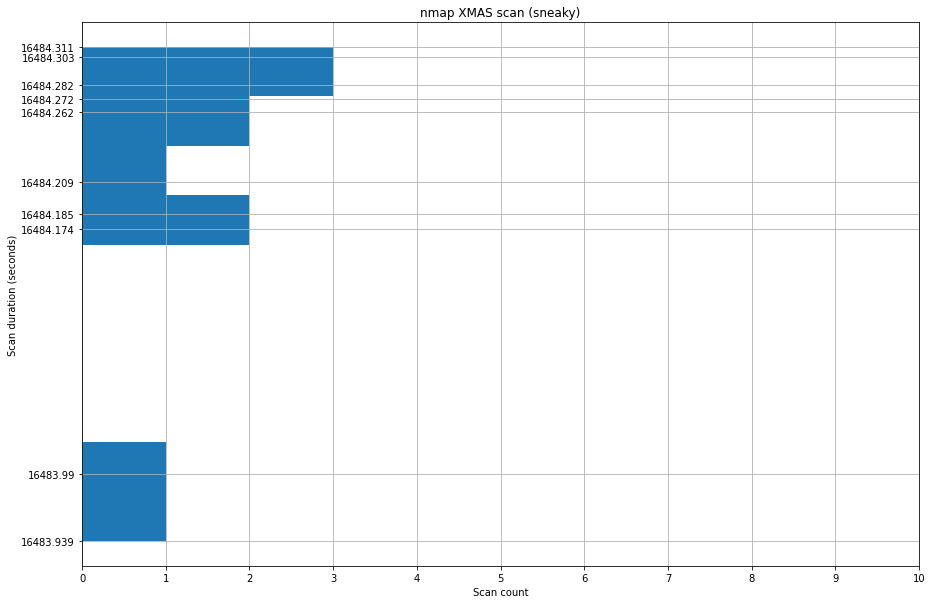

In [12]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [13]:
temp.describe()

,0
count,10.000000
mean,16484.192657
std,0.129662
min,16483.939228
25%,16484.176875
50%,16484.235155
75%,16484.279413
max,16484.310798


## Packet count

In [14]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [15]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [16]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.333398635696627



## Order of ports scanned


In [17]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 54926 111
2 54926 256
3 54926 1723
4 54926 22
5 54926 139
6 54926 199
7 54926 3306
8 54926 445
9 54926 8888
10 54926 8080
11 54931 111
12 54926 143
13 54926 3389
14 54926 554
15 54926 1025
16 54926 5900
17 54926 110
18 54926 443
19 54926 53
20 54926 995
21 54926 23
22 54933 111
23 54926 113
24 54926 80
25 54926 993
26 54926 587
27 54926 25
28 54926 21
29 54926 135
30 54926 1720
31 54926 11967
32 54926 2021
33 54935 111
34 54926 50500
35 54926 9100
36 54926 714
37 54926 9071
38 54926 1234
39 54926 4321
40 54926 10628
41 54926 100
42 54926 6389
43 54926 280
44 54937 111
45 54926 2022
46 54926 1164
47 54926 16018
48 54926 3013
49 54926 6007
50 54926 8290
51 54926 3493
52 54926 8651
53 54926 49152
54 54926 1102
55 54939 111
56 54926 6543
57 54926 700
58 54926 880
59 54926 3370
60 54926 19350
61 54926 1053
62 54926 2968
63 54926 49154
64 54926 5440
65 54926 444
66 54941 111
67 54926 6969
68 54926 2035
69 54926 2043
70 54926 8082
71 54926 2002
72 54926 787
73 54926 9618
74 54926 1036
75 54

564 54926 8001
565 54926 2604
566 54926 264
567 54926 51493
568 54926 5679
569 54926 1085
570 54926 5269
571 54926 10243
572 55033 111
573 54926 3945
574 54926 722
575 54926 3283
576 54926 1501
577 54926 1500
578 54926 5910
579 54926 48080
580 54926 3869
581 54926 25735
582 54926 1021
583 55035 111
584 54926 7778
585 54926 3766
586 54926 32769
587 54926 88
588 54926 2701
589 54926 1524
590 54926 1090
591 54926 2033
592 54926 5033
593 54926 3971
594 55037 111
595 54926 3269
596 54926 1166
597 54926 1091
598 54926 5911
599 54926 1272
600 54926 15000
601 54926 1056
602 54926 33899
603 54926 1108
604 54926 1900
605 55039 111
606 54926 1030
607 54926 42510
608 54926 1169
609 54926 3071
610 54926 1047
611 54926 1287
612 54926 711
613 54926 1999
614 54926 19801
615 54926 9535
616 55041 111
617 54926 45100
618 54926 1087
619 54926 7025
620 54926 109
621 54926 3905
622 54926 1048
623 54926 1023
624 54926 12265
625 54926 1783
626 54926 4446
627 55043 111
628 54926 1082
629 54926 38292
630 54926 

442 39872 4000
443 39872 5904
444 39872 3351
445 39872 5825
446 39872 3324
447 39872 4449
448 39872 9090
449 39872 667
450 39872 2035
451 39957 110
452 39872 1059
453 39872 1174
454 39872 2065
455 39872 43
456 39872 2002
457 39872 1093
458 39872 44443
459 39872 5221
460 39872 1164
461 39872 7004
462 39959 110
463 39872 88
464 39872 714
465 39872 1641
466 39872 7921
467 39872 6156
468 39872 3260
469 39872 7627
470 39872 57797
471 39872 2042
472 39872 524
473 39961 110
474 39872 458
475 39872 990
476 39872 3920
477 39872 3546
478 39872 49153
479 39872 5001
480 39872 3268
481 39872 512
482 39872 8008
483 39872 3301
484 39963 110
485 39872 1935
486 39872 9415
487 39872 56738
488 39872 1198
489 39872 9502
490 39872 5002
491 39872 425
492 39872 1296
493 39872 5280
494 39872 1300
495 39965 110
496 39872 49167
497 39872 8290
498 39872 52822
499 39872 9220
500 39872 1061
501 39872 5718
502 39872 514
503 39872 70
504 39872 5999
505 39872 10082
506 39967 110
507 39872 44501
508 39872 1328
509 398

342 52406 5822
343 52406 3869
344 52406 1039
345 52406 1030
346 52406 6389
347 52406 14441
348 52406 2106
349 52406 9050
350 52406 44442
351 52406 1186
352 52473 443
353 52406 1080
354 52406 9929
355 52406 3052
356 52406 8291
357 52406 801
358 52406 7019
359 52406 8002
360 52406 5566
361 52406 5963
362 52406 6969
363 52475 443
364 52406 9418
365 52406 6666
366 52406 8100
367 52406 1296
368 52406 5120
369 52406 49155
370 52406 2200
371 52406 3809
372 52406 8292
373 52406 3493
374 52477 443
375 52406 13
376 52406 37
377 52406 3371
378 52406 903
379 52406 3006
380 52406 1126
381 52406 6566
382 52406 3914
383 52406 1123
384 52406 7025
385 52479 443
386 52406 2717
387 52406 16018
388 52406 20005
389 52406 2998
390 52406 765
391 52406 3995
392 52406 5877
393 52406 3011
394 52406 32774
395 52406 7435
396 52481 443
397 52406 2020
398 52406 1068
399 52406 49156
400 52406 2100
401 52406 1028
402 52406 5811
403 52406 32770
404 52406 52869
405 52406 9000
406 52406 3077
407 52483 443
408 52406 2718

243 34231 1687
244 34231 8701
245 34231 3809
246 34231 8086
247 34231 6502
248 34231 1122
249 34231 3869
250 34231 1055
251 34231 10002
252 34231 5811
253 34280 80
254 34231 43
255 34231 1062
256 34231 9898
257 34231 11110
258 34231 20005
259 34231 16113
260 34231 5120
261 34231 49400
262 34231 720
263 34231 7004
264 34282 80
265 34231 8654
266 34231 1154
267 34231 2021
268 34231 1063
269 34231 61900
270 34231 1783
271 34231 3128
272 34231 2500
273 34231 3325
274 34231 16012
275 34284 80
276 34231 89
277 34231 32772
278 34231 2910
279 34231 3006
280 34231 55600
281 34231 7000
282 34231 254
283 34231 55056
284 34231 7103
285 34231 8193
286 34286 80
287 34231 1972
288 34231 1145
289 34231 9575
290 34231 2323
291 34231 1187
292 34231 541
293 34231 5907
294 34231 903
295 34231 32779
296 34231 808
297 34288 80
298 34231 406
299 34231 3031
300 34231 17988
301 34231 888
302 34231 10778
303 34231 1141
304 34231 8254
305 34231 1271
306 34231 32768
307 34231 1058
308 34290 80
309 34231 1031
310 

823 34231 1036
824 34231 56737
825 34384 80
826 34231 2383
827 34231 5061
828 34231 9998
829 34231 8652
830 34231 1443
831 34231 5214
832 34231 99
833 34231 1174
834 34231 10004
835 34231 27352
836 34386 80
837 34231 687
838 34231 56738
839 34231 306
840 34231 16001
841 34231 617
842 34231 10616
843 34231 2040
844 34231 4224
845 34231 6346
846 34231 30718
847 34388 80
848 34231 1165
849 34231 5544
850 34231 5952
851 34231 9110
852 34231 20221
853 34231 33
854 34231 40911
855 34231 3986
856 34231 6543
857 34231 3017
858 34390 80
859 34231 3052
860 34231 7999
861 34231 616
862 34231 2394
863 34231 49
864 34231 8009
865 34231 1137
866 34231 2043
867 34231 1123
868 34231 1124
869 34392 80
870 34231 35500
871 34231 1047
872 34231 2190
873 34231 52848
874 34231 5221
875 34231 912
876 34231 8031
877 34231 1098
878 34231 9595
879 34231 3703
880 34394 80
881 34231 999
882 34231 4899
883 34231 873
884 34231 10243
885 34231 1556
886 34231 26214
887 34231 1130
888 34231 1042
889 34231 3851
890 342

310 55619 16018
311 55619 2525
312 55619 3301
313 55619 2006
314 55619 1059
315 55619 3889
316 55619 1175
317 55619 1145
318 55619 3324
319 55680 110
320 55619 9102
321 55619 65129
322 55619 51493
323 55619 3905
324 55619 106
325 55619 2008
326 55619 57294
327 55619 1556
328 55619 631
329 55619 32773
330 55682 110
331 55619 3737
332 55619 5003
333 55619 10617
334 55619 2260
335 55619 1039
336 55619 27715
337 55619 1434
338 55619 14000
339 55619 8994
340 55619 1021
341 55684 110
342 55619 6004
343 55619 1086
344 55619 3551
345 55619 1124
346 55619 5859
347 55619 7007
348 55619 1147
349 55619 2047
350 55619 6667
351 55619 49154
352 55686 110
353 55619 1998
354 55619 4321
355 55619 9502
356 55619 7019
357 55619 49161
358 55619 2701
359 55619 6510
360 55619 1107
361 55619 1455
362 55619 1060
363 55688 110
364 55619 49999
365 55619 5962
366 55619 648
367 55619 1152
368 55619 5221
369 55619 5862
370 55619 8042
371 55619 13783
372 55619 27353
373 55619 34572
374 55690 110
375 55619 1236
376 5

882 55619 10215
883 55619 465
884 55619 3476
885 55619 1026
886 55619 1132
887 55619 1840
888 55619 4003
889 55619 8181
890 55619 9943
891 55784 110
892 55619 3013
893 55619 8008
894 55619 2500
895 55619 23502
896 55619 4998
897 55619 514
898 55619 3546
899 55619 1042
900 55619 1947
901 55619 13722
902 55786 110
903 55619 5357
904 55619 1687
905 55619 2717
906 55619 52848
907 55619 2099
908 55619 3493
909 55619 8400
910 55619 2035
911 55619 3006
912 55619 9002
913 55788 110
914 55619 4126
915 55619 1033
916 55619 5269
917 55619 9110
918 55619 1183
919 55619 1600
920 55619 1971
921 55619 62078
922 55619 32783
923 55619 1067
924 55790 110
925 55619 7911
926 55619 9998
927 55619 1070
928 55619 2601
929 55619 9207
930 55619 52822
931 55619 2043
932 55619 1443
933 55619 3017
934 55619 406
935 55792 110
936 55619 1038
937 55619 8899
938 55619 8087
939 55619 4567
940 55619 50800
941 55619 6346
942 55619 4129
943 55619 2038
944 55619 6788
945 55619 8402
946 55794 110
947 55619 8443
948 55619 5

373 48055 2013
374 48126 3389
375 48055 2557
376 48055 3168
377 48055 1999
378 48055 6025
379 48055 1029
380 48055 58080
381 48055 3001
382 48055 2301
383 48055 10180
384 48055 5911
385 48128 3389
386 48055 3011
387 48055 1169
388 48055 82
389 48055 3211
390 48055 2602
391 48055 4001
392 48055 2043
393 48055 783
394 48055 425
395 48055 8021
396 48130 3389
397 48055 8085
398 48055 3905
399 48055 1801
400 48055 6788
401 48055 2251
402 48055 1641
403 48055 631
404 48055 62078
405 48055 9101
406 48055 61532
407 48132 3389
408 48055 5925
409 48055 2040
410 48055 32785
411 48055 1071
412 48055 9080
413 48055 70
414 48055 10009
415 48055 8086
416 48055 9485
417 48055 1083
418 48134 3389
419 48055 1174
420 48055 2105
421 48055 1123
422 48055 20221
423 48055 720
424 48055 8500
425 48055 3826
426 48055 2100
427 48055 1163
428 48055 1042
429 48136 3389
430 48055 1060
431 48055 8084
432 48055 50000
433 48055 2046
434 48055 6792
435 48055 7496
436 48055 60020
437 48055 625
438 48055 407
439 48055 1

1020 48055 3784
1021 48055 65389
1022 48055 19801
1023 48244 3389
1024 48055 6156
1025 48055 5431
1026 48055 5678
1027 48055 5822
1028 48055 2099
1029 48055 7025
1030 48055 1119
1031 48055 13782
1032 48055 1122
1033 48055 1085
1034 48246 3389
1035 48055 1141
1036 48055 4321
1037 48055 1044
1038 48055 5679
1039 48055 3390
1040 48055 1145
1041 48055 1700
1042 48055 7435
1043 48055 6100
1044 48055 2920
1045 48248 3389
1046 48055 5922
1047 48055 9103
1048 48055 3367
1049 48055 2196
1050 48055 3268
1051 48055 2034
1052 48055 42
1053 48055 34572
1054 48055 1026
1055 48055 683
1056 48250 3389
1057 48055 1096
1058 48055 7070
1059 48055 6580
1060 48055 9917
1061 48055 18101
1062 48055 1117
1063 48055 5906
1064 48055 2607
1065 48055 667
1066 48055 2605
1067 48252 3389
1068 48055 2967
1069 48055 32770
1070 48055 9944
1071 48055 726
1072 48055 1187
1073 48055 1040
1074 48055 1033
1075 48055 1075
1076 48055 2030
1077 48055 801
1078 48254 3389
1079 48055 1521
1080 48055 514
1081 48055 4449
1082 4805

1036 41228 9101
1037 41228 32775
1038 41228 11967
1039 41228 6389
1040 41228 9001
1041 41228 1044
1042 41228 1862
1043 41228 5002
1044 41228 5904
1045 41421 3306
1046 41228 16018
1047 41228 3971
1048 41228 8300
1049 41228 2222
1050 41228 3827
1051 41228 16992
1052 41228 1047
1053 41228 32783
1054 41228 3268
1055 41228 3351
1056 41423 3306
1057 41228 50006
1058 41228 1183
1059 41228 28201
1060 41228 5825
1061 41228 3880
1062 41228 3918
1063 41228 83
1064 41228 2041
1065 41228 8222
1066 41228 1600
1067 41425 3306
1068 41228 99
1069 41228 16000
1070 41228 2135
1071 41228 6669
1072 41228 1071
1073 41228 32778
1074 41228 2602
1075 41228 49156
1076 41228 15004
1077 41228 12345
1078 41427 3306
1079 41228 2035
1080 41228 1
1081 41228 10003
1082 41228 12265
1083 41228 2869
1084 41228 20828
1085 41228 2111
1086 41228 13
1087 41228 5566
1088 41228 3517
1089 41429 3306
1090 41228 1043
1091 41228 52822
1092 41228 3800
1093 41228 7777
1094 41228 18101
1095 41228 3168
1096 41228 85
1097 41228 3390
10

512 45823 3300
513 45823 3737
514 45823 10617
515 45823 2007
516 45823 5960
517 45920 5900
518 45823 2725
519 45823 3809
520 45823 1310
521 45823 1971
522 45823 49161
523 45823 17988
524 45823 9099
525 45823 10003
526 45823 7496
527 45823 16992
528 45922 5900
529 45823 8100
530 45823 1049
531 45823 1121
532 45823 7800
533 45823 3000
534 45823 8873
535 45823 5004
536 45823 1055
537 45823 10778
538 45823 8181
539 45924 5900
540 45823 1148
541 45823 749
542 45823 1434
543 45823 1149
544 45823 902
545 45823 10024
546 45823 34571
547 45823 32781
548 45823 1309
549 45823 711
550 45926 5900
551 45823 1046
552 45823 23502
553 45823 800
554 45823 7070
555 45823 3517
556 45823 5911
557 45823 19842
558 45823 4129
559 45823 14000
560 45823 85
561 45928 5900
562 45823 1900
563 45823 55056
564 45823 2811
565 45823 30
566 45823 4001
567 45823 9595
568 45823 1045
569 45823 2020
570 45823 24800
571 45823 50389
572 45930 5900
573 45823 5080
574 45823 544
575 45823 54045
576 45823 55555
577 45823 4550
57

80 57005 13
81 57005 1236
82 57005 1047
83 57005 1277
84 57005 1051
85 57005 9929
86 57005 6007
87 57005 1971
88 57024 3306
89 57005 2323
90 57005 30000
91 57005 49400
92 57005 27353
93 57005 987
94 57005 8011
95 57005 1055
96 57005 4224
97 57005 6666
98 57005 15004
99 57026 3306
100 57005 5000
101 57005 5003
102 57005 497
103 57005 35500
104 57005 161
105 57005 49154
106 57005 7200
107 57005 4998
108 57005 32780
109 57005 8181
110 57028 3306
111 57005 179
112 57005 5222
113 57005 1154
114 57005 10001
115 57005 1174
116 57005 1594
117 57005 7100
118 57005 8701
119 57005 5061
120 57005 12265
121 57030 3306
122 57005 8031
123 57005 444
124 57005 13783
125 57005 1533
126 57005 19
127 57005 1093
128 57005 2601
129 57005 5190
130 57005 9500
131 57005 1088
132 57032 3306
133 57005 44443
134 57005 1801
135 57005 2393
136 57005 13456
137 57005 3814
138 57005 1234
139 57005 8192
140 57005 8300
141 57005 8200
142 57005 6668
143 57034 3306
144 57005 5825
145 57005 32773
146 57005 9050
147 57005 2

66 63798 554
67 63783 2701
68 63783 2522
69 63783 687
70 63783 38292
71 63783 1216
72 63783 3404
73 63783 49999
74 63783 9900
75 63783 1067
76 63783 10778
77 63800 554
78 63783 10621
79 63783 2043
80 63783 1042
81 63783 16001
82 63783 5902
83 63783 6668
84 63783 903
85 63783 60443
86 63783 1078
87 63783 9618
88 63802 554
89 63783 1521
90 63783 541
91 63783 1524
92 63783 57294
93 63783 26
94 63783 1048
95 63783 3370
96 63783 3011
97 63783 28201
98 63783 2557
99 63804 554
100 63783 2002
101 63783 1533
102 63783 6789
103 63783 1914
104 63783 1500
105 63783 2717
106 63783 26214
107 63783 5280
108 63783 1998
109 63783 5225
110 63806 554
111 63783 1085
112 63783 10616
113 63783 9200
114 63783 1301
115 63783 50300
116 63783 2001
117 63783 911
118 63783 8899
119 63783 11110
120 63783 3323
121 63808 554
122 63783 1218
123 63783 1059
124 63783 1717
125 63783 44442
126 63783 4321
127 63783 3322
128 63783 5102
129 63783 6565
130 63783 49163
131 63783 2910
132 63810 554
133 63783 1122
134 63783 300

647 63783 1094
648 63783 3905
649 63904 554
650 63783 515
651 63783 1580
652 63783 1149
653 63783 514
654 63783 6002
655 63783 85
656 63783 4224
657 63783 2800
658 63783 6
659 63783 8300
660 63906 554
661 63783 1072
662 63783 8383
663 63783 5087
664 63783 10243
665 63783 1352
666 63783 3261
667 63783 1030
668 63783 873
669 63783 5811
670 63783 7435
671 63908 554
672 63783 2394
673 63783 3551
674 63783 32773
675 63783 1247
676 63783 4
677 63783 32781
678 63783 44443
679 63783 9040
680 63783 18040
681 63783 146
682 63910 554
683 63783 34572
684 63783 7777
685 63783 19842
686 63783 2920
687 63783 5550
688 63783 464
689 63783 5061
690 63783 50636
691 63783 51103
692 63783 27355
693 63912 554
694 63783 8290
695 63783 1503
696 63783 1185
697 63783 1322
698 63783 1076
699 63783 13782
700 63783 6000
701 63783 2323
702 63783 801
703 63783 9594
704 63914 554
705 63783 8192
706 63783 57797
707 63783 5001
708 63783 1090
709 63783 8086
710 63783 5226
711 63783 49157
712 63783 1024
713 63783 4444
71

In [18]:
orders_port

,scannr,sport,dport
0,1,54926,111
1,2,54926,256
2,3,54926,1723
3,4,54926,22
4,5,54926,139
...,...,...,...
10985,1095,63783,3998
10986,1096,63783,9503
10987,1097,63783,8011
10988,1098,63783,5906


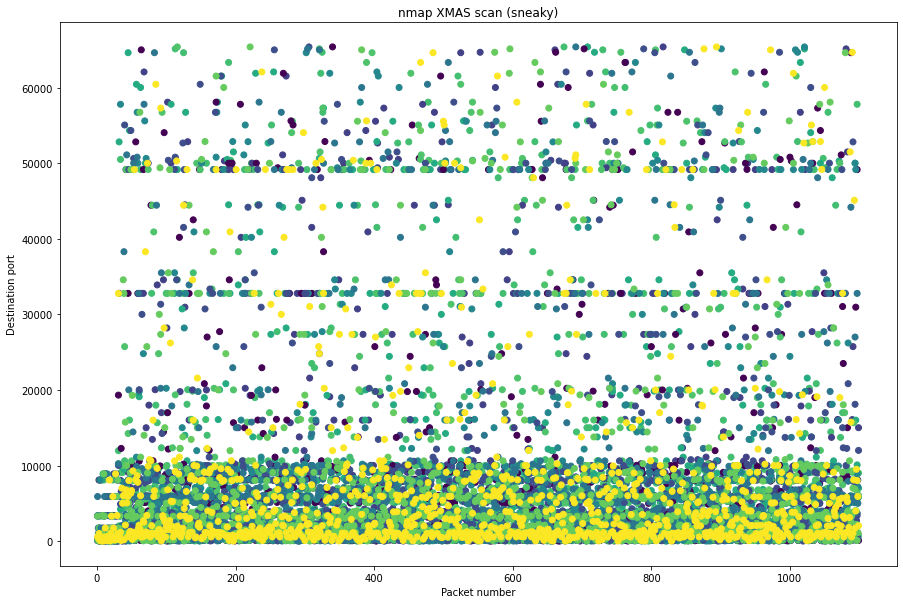

In [19]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [20]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [21]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

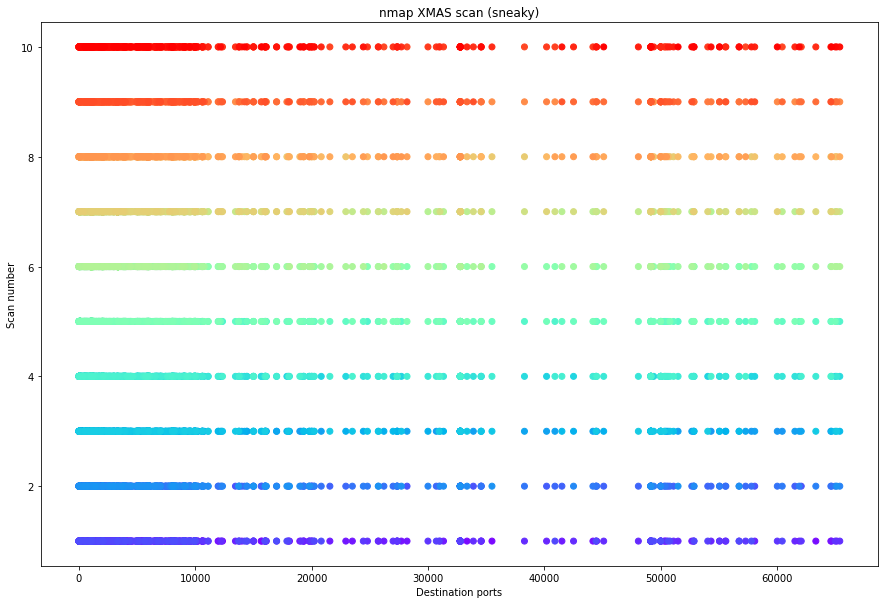

In [22]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


In [46]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [47]:
print(len(unused_ports))

64535


In [48]:
print(len(used_ports))

1000


## Payloads

In [23]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

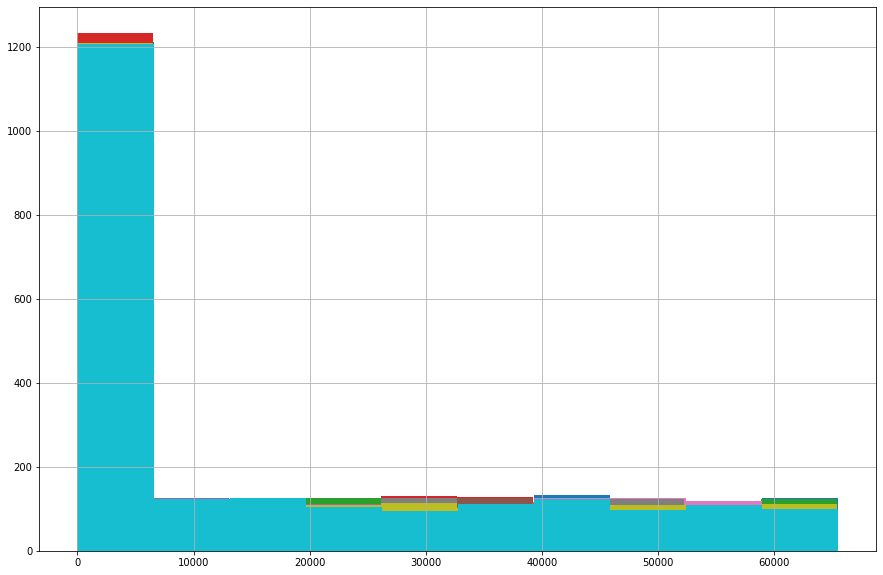

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

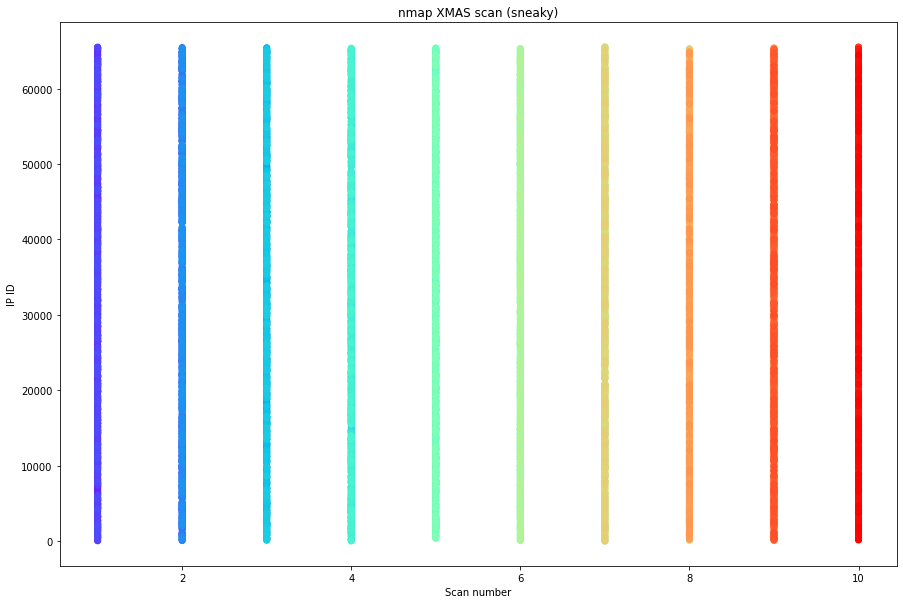

In [28]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


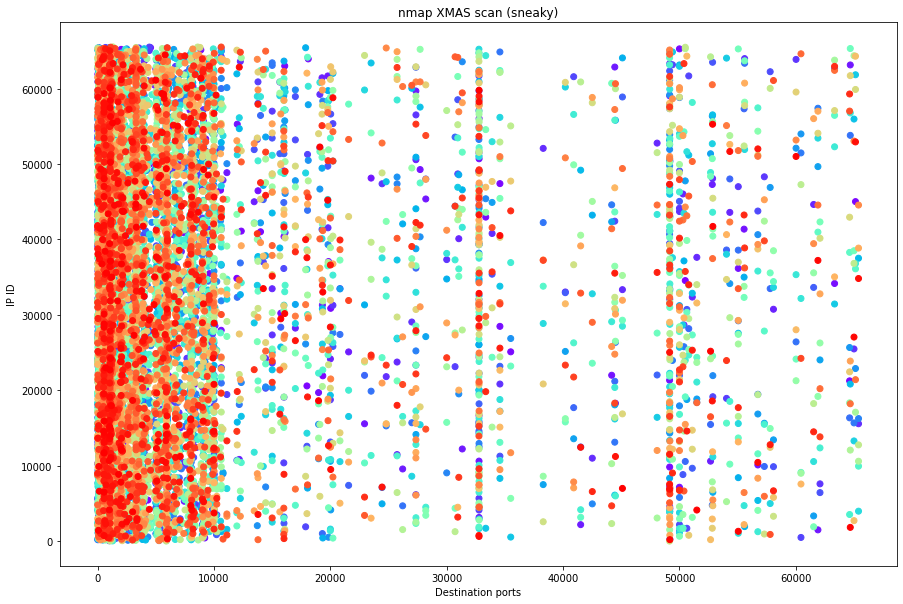

In [29]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

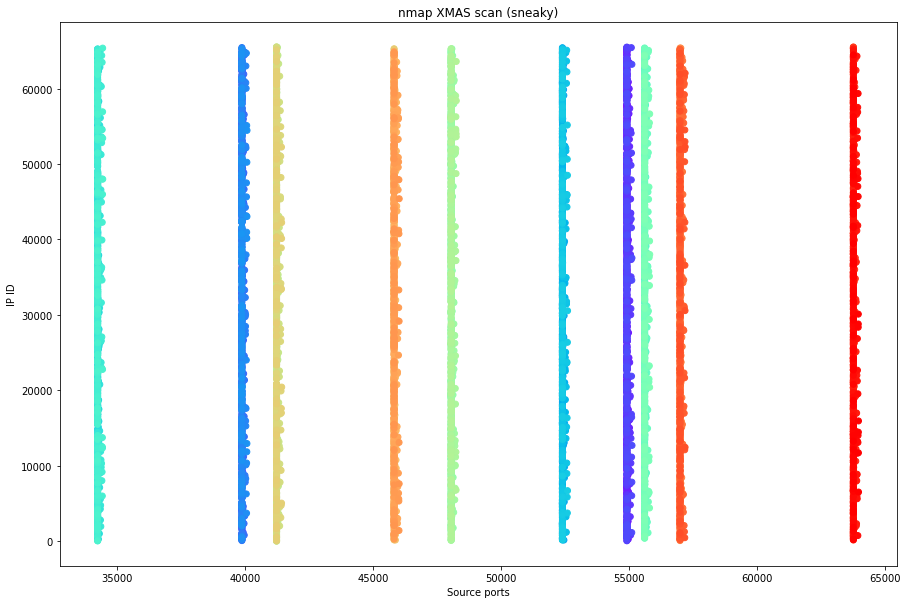

In [30]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    x = src_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
-----
Pack

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [33]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671022428
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671153502
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1670760272
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 167

Sequence number: 1671219033
Sequence number: 1663158244
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1663289318
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1667090328
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1671219033
Sequence number: 1667221402
Sequence number: 167

Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1798132652
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1798263726
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1797870504
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 1803310077
Sequence number: 180

Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1947624947
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1952998797
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1953129871
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 194

Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1957717333
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1957848407
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1957979473
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 1948870092
Sequence number: 194

Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2849173737
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2849829095
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2849960165
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 2840981614
Sequence number: 284

Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1377707654
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1377314432
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1377445506
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 1376593557
Sequence number: 137

Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238243528
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238898886
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 239029956
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
S

Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 240602796
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 240209578
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 240340648
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
Sequence number: 238309071
S

Sequence number: 3485003574
Sequence number: 3489132409
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3488214887
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3488345957
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3485003574
Sequence number: 3488477027
Sequence number: 348

Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3234524402
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3234393328
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3234786550
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 3226725483
Sequence number: 322

Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4217346384
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4217215314
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 4217084244
Sequence number: 4216756569
Sequence number: 4216756569
Sequence number: 421

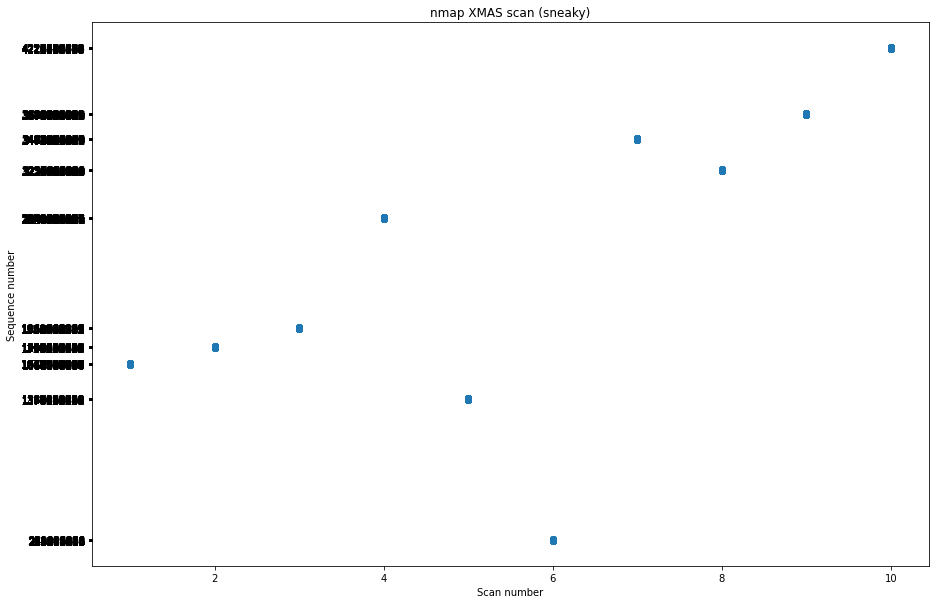

In [34]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


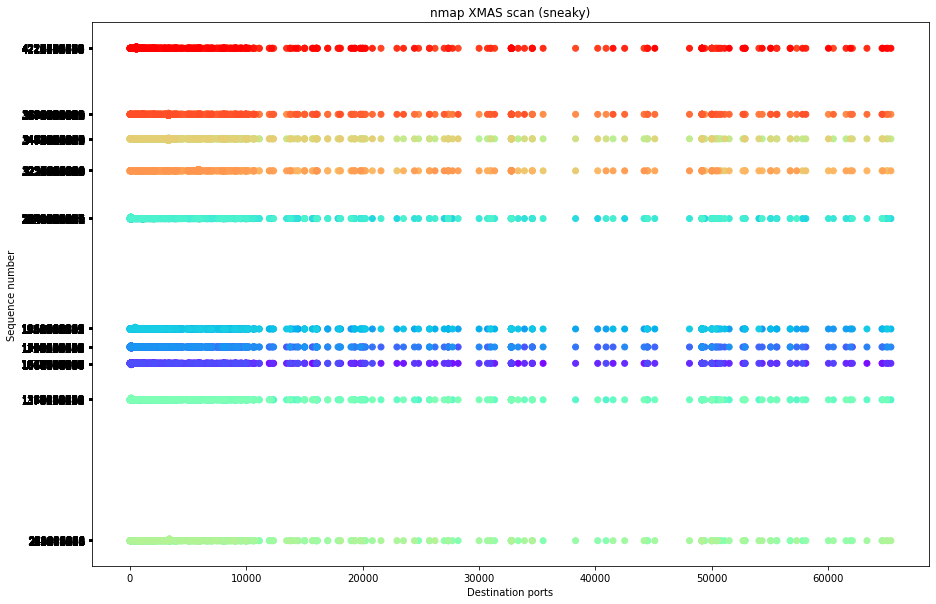

In [35]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

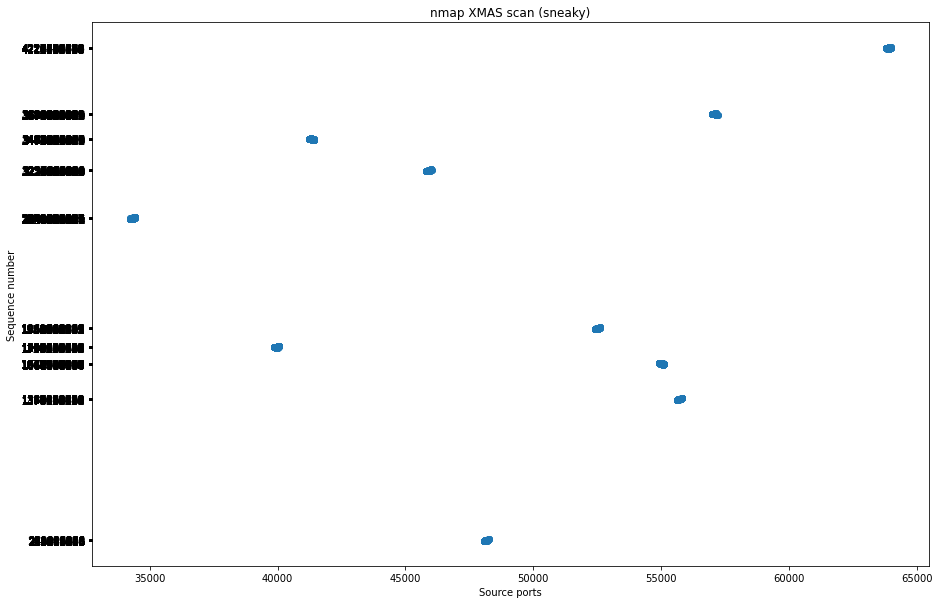

In [36]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [37]:
len(set(orders_port['sport']))

1000

In [41]:
orders_port['sport'].value_counts()[:30]

54926    1000
39872    1000
63783    1000
57005    1000
45823    1000
41228    1000
55619    1000
34231    1000
52406    1000
48055    1000
54949       1
41351       1
41355       1
41357       1
41359       1
41361       1
41363       1
41365       1
41367       1
41369       1
41371       1
41373       1
41375       1
41377       1
41379       1
41381       1
41383       1
41385       1
41387       1
41389       1
Name: sport, dtype: int64

## Flags

In [38]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
-----
